### Atividade Data Mining

#### Tema: Venda de Carros
#### Objetivo: Desenvolver um algoritmo de aprendizado de máquina que estime a probabilidade de uma pessoa adquirir um determinado tipo de carro, com base em características como sua renda anual e preferências de compra.

#### Exemplo:  Estimar a probabilidade de uma pessoa com uma renda anual de 30k USD comprar um sedan no valor de 50k USD.

#### Dataset: https://www.kaggle.com/datasets/missionjee/car-sales-report

#### OBS: Dataset reduzido de 23k linhas para 5k linhas

### Integrantes:

#### Bruno de Moraes Xavier da Silva
#### Igor Altafini Teodoro 
#### Luan Vinicius Garcia 

### Importando Arquivos e Bibliotecas necessarias

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('./dataset/carros_vendas.csv')

### Explorando o Dataset

In [3]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


##### Podemos observar que alguns nomes estão escritos de maneira incorreta(coluna Engine) alem da coluna 'Date' que possui os mesmo valores para todos os registros

In [4]:
data.shape

(5000, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         5000 non-null   object
 1   Date           5000 non-null   object
 2   Customer Name  5000 non-null   object
 3   Gender         5000 non-null   object
 4   Annual Income  5000 non-null   int64 
 5   Dealer_Name    5000 non-null   object
 6   Company        5000 non-null   object
 7   Model          5000 non-null   object
 8   Engine         5000 non-null   object
 9   Transmission   5000 non-null   object
 10  Color          5000 non-null   object
 11  Price ($)      5000 non-null   int64 
 12  Dealer_No      5000 non-null   object
 13  Body Style     5000 non-null   object
 14  Phone          5000 non-null   int64 
 15  Dealer_Region  5000 non-null   object
dtypes: int64(3), object(13)
memory usage: 625.1+ KB


#### Podemos observar que nao ha nenhum dado faltando neste dataset

In [6]:
data.describe()

,Annual Income,Price ($),Phone
count,5.000000e+03,5000.000000,5.000000e+03
mean,8.690544e+05,28236.414400,7.493386e+06
std,7.556848e+05,14821.590317,8.696176e+05
min,1.350000e+04,9000.000000,6.000326e+06
25%,4.050000e+05,18100.000000,6.742709e+06
50%,7.525000e+05,23000.000000,7.494095e+06
75%,1.230000e+06,34625.750000,8.238121e+06
max,6.240000e+06,85600.000000,8.999305e+06


In [7]:
data['Price ($)'].describe()

count     5000.000000
mean     28236.414400
std      14821.590317
min       9000.000000
25%      18100.000000
50%      23000.000000
75%      34625.750000
max      85600.000000
Name: Price ($), dtype: float64

In [8]:
data['Annual Income'].describe()

count    5.000000e+03
mean     8.690544e+05
std      7.556848e+05
min      1.350000e+04
25%      4.050000e+05
50%      7.525000e+05
75%      1.230000e+06
max      6.240000e+06
Name: Annual Income, dtype: float64

### Normalizando Dados

#### Corrigindo nomenclaturas

In [9]:
data['Engine'] = data['Engine'].str.replace('Â','',regex=False)
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [10]:
data.loc[data['Engine'] == "Overhead Camshaft",'Engine'] = 'OHC'
data.head(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,OHC,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville


In [11]:
data = data.drop(data.columns[1],axis = 1)
data.head(2)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


### Analisando os dados Normalizados

In [12]:
tipo_carroceria = data['Body Style'].value_counts()
print(tipo_carroceria)

Body Style
Hatchback    1475
SUV          1366
Sedan         953
Passenger     795
Hardtop       411
Name: count, dtype: int64


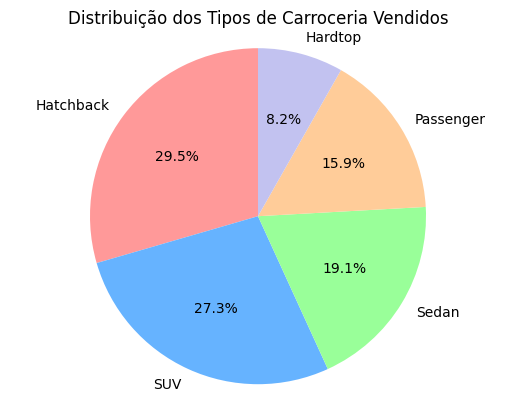

In [13]:
plt.pie(tipo_carroceria, labels=tipo_carroceria.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.axis('equal')

plt.title('Distribuição dos Tipos de Carroceria Vendidos')

plt.show()

##### Podemos observar que o tipo de carroceria mais vendido é o hatchback

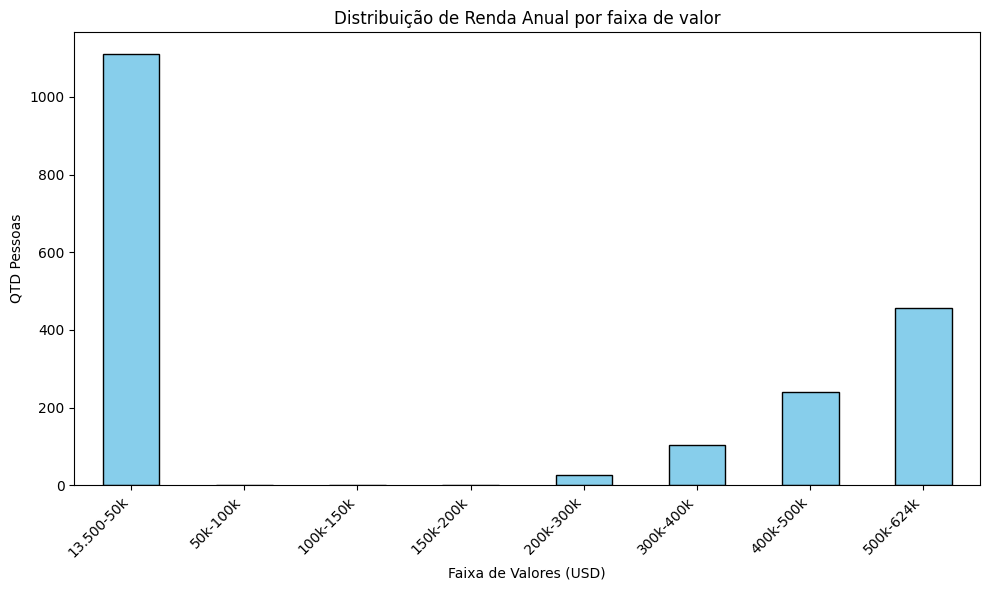

In [14]:
bins = [13500, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 624000]

legendas = ['13.500-50k', '50k-100k', '100k-150k', '150k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-624k']

distribuicao_salario = pd.cut(data['Annual Income'],bins = bins,labels = legendas,right = False)

count = distribuicao_salario.value_counts().sort_index()

plt.figure(figsize=(10,6))
count.plot(kind='bar',color='skyblue',edgecolor='black')

plt.title('Distribuição de Renda Anual por faixa de valor')
plt.xlabel('Faixa de Valores (USD)')
plt.ylabel('QTD Pessoas')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

plt.show()

##### Podemos observar que a grande maioria das pessoas ganham entre 13.5k a 50k (USD)

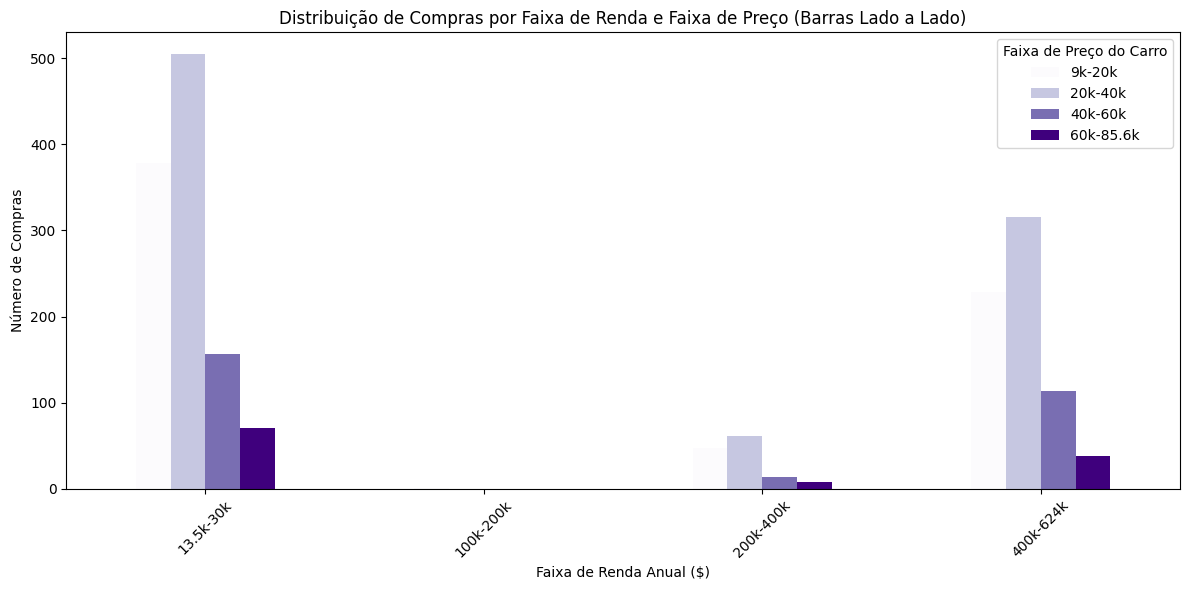

In [15]:
salario_valor = [13500, 30000, 50000, 100000, 200000, 400000, 624000]
carro_valor = [9000, 20000, 40000, 60000, 85600]

range_salario = pd.cut(data['Annual Income'],bins=salario_valor,
                           labels=["13.5k-30k", "30k-50k", "50k-100k", "100k-200k", "200k-400k", "400k-624k"], right=False)

range_carro = pd.cut(data['Price ($)'],bins=carro_valor,
                      labels=["9k-20k", "20k-40k", "40k-60k", "60k-85.6k"], right=False)


count = pd.crosstab(range_salario,range_carro)

count.plot(kind='bar',figsize=(12, 6), cmap="Purples")
plt.title('Distribuição de Compras por Faixa de Renda e Faixa de Preço (Barras Lado a Lado)')
plt.xlabel('Faixa de Renda Anual ($)')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.legend(title='Faixa de Preço do Carro')
plt.tight_layout()
plt.show()

plt.show()

##### Podemos perceber que a grande maioria das pessoas compram carros com o valor entre 20k-40k

### Utilizando Ml para realizar Previsoes

#### Removendo colunas que não serão utilizadas

In [16]:
data.head(1)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown


In [17]:
data = data.drop(['Car_id', 'Customer Name','Phone'], axis=1)
data.head(1)

,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown


#### Dividindo o dataset em Teste e Treino

In [18]:
X = data.drop(columns=['Body Style'])
y = data['Body Style']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Pre-processamento

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Annual Income', 'Price ($)']),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), ['Gender', 'Color', 'Model', 'Engine', 'Transmission', 'Dealer_Name', 
              'Company', 'Dealer_Region'])
    ]
)


##### Balanceando os dados

#### Fazendo a previsão utilizando o KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)

In [21]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', knn) 
])

In [22]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Annual Income',
                                                   'Price ($)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Color', 'Model',
                                                   'Engine', 'Transmission',
                                                   'Dealer_Name', 'Company',
                                                   'Dealer_Region'])])),
                ('classifier', KNeighborsClassifier())])

In [23]:
y_pred = pipeline.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisão: {accuracy * 100:.2f}%')

Precisão: 71.27%


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Hardtop       0.30      0.34      0.32       111
   Hatchback       0.67      0.74      0.70       453
   Passenger       0.78      0.78      0.78       225
         SUV       0.77      0.73      0.75       418
       Sedan       0.88      0.73      0.80       293

    accuracy                           0.71      1500
   macro avg       0.68      0.67      0.67      1500
weighted avg       0.73      0.71      0.72      1500



##### Após o treinamento do modelo foi possivel atingir uma precisão de 71.33% geral mas o f1 score do Hardtop possui uma taxa de precisão muito inferior(32%) se comparada com os outros tipos de carroceria,indicando que o algoritimo possui uma certa dificuldade em relação a este tipo de carroceria,tambem podemos observar que o dataset esta desbalanceado

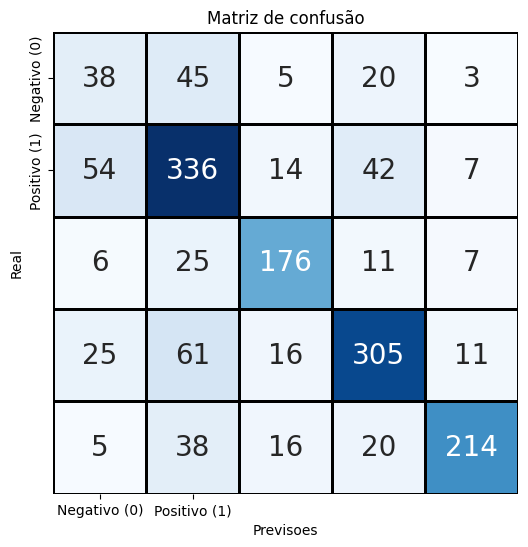

In [26]:
cm = confusion_matrix(y_test,y_pred)

labels = [
    ["Positivo","Falso Positivo"],
    ["Falso Negativo","Negativo"]
]

fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 20, 'ha': 'center', 'va': 'center'}, 
            linewidths=1, linecolor='black')

plt.title("Matriz de confusão")
plt.xlabel("Previsoes")
plt.ylabel("Real")

plt.xticks([0.5, 1.5], ['Negativo (0)', 'Positivo (1)'], fontsize=10)
plt.yticks([0.5, 1.5], ['Negativo (0)', 'Positivo (1)'], fontsize=10)

plt.show()

### Tentativa de Melhoria do F1 Score

In [27]:
smote = SMOTE(random_state=42)

X_train_pre = preprocessor.fit_transform(X_train)

X_train_blc, y_train_blc = smote.fit_resample(X_train_pre, y_train)

In [28]:
knn.fit(X_train_blc, y_train_blc)

KNeighborsClassifier()

In [29]:
X_test_transformed = preprocessor.transform(X_test)

y_pred = knn.predict(X_test_transformed)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisão: {accuracy * 100:.2f}%')

Precisão: 64.00%


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Hardtop       0.22      0.69      0.33       111
   Hatchback       0.79      0.53      0.63       453
   Passenger       0.66      0.82      0.73       225
         SUV       0.83      0.58      0.68       418
       Sedan       0.80      0.74      0.77       293

    accuracy                           0.64      1500
   macro avg       0.66      0.67      0.63      1500
weighted avg       0.74      0.64      0.67      1500



##### Após balancear os dados oberva-se que o precisão do modelo diminuiu em 4.77% (de 71.33 para 66.53)

### Fazendo a previsão utilizando o Random Forest

In [44]:
forest = RandomForestClassifier(random_state=42)

In [45]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', forest) 
])

In [46]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Annual Income',
                                                   'Price ($)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Color', 'Model',
                                                   'Engine', 'Transmission',
                                                   'Dealer_Name', 'Company',
                                                   'Dealer_Region'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [47]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Hardtop       0.33      0.40      0.36       111
   Hatchback       0.84      0.85      0.84       453
   Passenger       1.00      1.00      1.00       225
         SUV       0.93      0.87      0.90       418
       Sedan       1.00      1.00      1.00       293

    accuracy                           0.87      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.88      0.87      0.88      1500



In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisão: {accuracy * 100:.2f}%')

Precisão: 87.27%


#### Utilizando o modelo de RF a precisão do modelo foi de 73% para 87%,um ganho de 14%

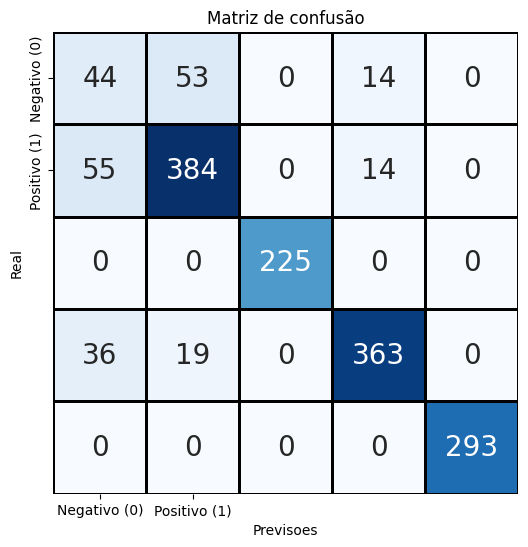

In [49]:
cm = confusion_matrix(y_test,y_pred)

labels = [
    ["Positivo","Falso Positivo"],
    ["Falso Negativo","Negativo"]
]

fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 20, 'ha': 'center', 'va': 'center'}, 
            linewidths=1, linecolor='black')

plt.title("Matriz de confusão")
plt.xlabel("Previsoes")
plt.ylabel("Real")

plt.xticks([0.5, 1.5], ['Negativo (0)', 'Positivo (1)'], fontsize=10)
plt.yticks([0.5, 1.5], ['Negativo (0)', 'Positivo (1)'], fontsize=10)

plt.show()

### Conclusão

#### Entre os dois modelos testados o Random Forest teve a melhor performance,dado ao fato de que o mesmo é mais recomendado para datasets desbalanceados que possuem grandes quantidades de dados,já o KNN é mais recomendado para datasets menores,onde o resultado esperado não é muito complexo